In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import sys
# dir_path='../control_transition'
# sys.path.append(dir_path)

In [4]:
# from plot_utils import *

In [5]:
from rqc import *

In [ ]:
# from importlib import reload


# import plot_utils
# reload(plot_utils)
# from plot_utils import *

In [ ]:
# from diffusion_utils import *

In [ ]:
# from importlib import reload


# import diffusion_utils
# reload(diffusion_utils)
# from diffusion_utils import *

# API

In [3]:
params_list=[
# ({'nu':0,'de':1,},{'L':np.arange(10,31,10),'p_ctrl':[0.4,.5,0.59],'p_proj':np.linspace(0.0,0.0,1),'s':np.arange(0,20)}),
# ({'nu':0,'de':1,},{'L':np.arange(10,31,10),'p_ctrl':[.5,0.4,0.59],'p_proj':np.linspace(0.0,0.0,1),'s':np.arange(0,2000)}),
({'nu':0,'de':1,},{'s':np.arange(0,10),'L':[20],'p_ctrl':[.5],'p_proj':np.linspace(0.0,0.0,1),}),
# ,0.4,0.59
# ({'nu':0,'de':1,},{'p_ctrl':np.linspace(0.4,0.6,21),'p_proj':np.linspace(0.0,0.0,1),'s':np.arange(2000),'L':np.arange(20,61,10)}),
# ({'nu':0,'de':1,},{'p_ctrl':[0.4,0.5,0.59],'p_proj':np.linspace(0.0,0.0,1),'s':np.arange(10000),'L':np.arange(20,61,10)}),
]

In [ ]:
for fixed_params,vary_params in params_list:
    data_MPS_0_T_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_s{s}_coherence.json',
        fn_dir_template='/home/jake/Data',
        input_params_template='',
        load_data=load_zip_json,
        filename=None,
        filelist=None,
        load=True,
        data_dict={'fn':set()},
        # data_dict_file='xj({nu},{de})_coherence.pickle', 
        zip_fn='/home/jake/Data/MPS_0-1_coherence_x01.zip'
        # zip_fn='./MPS_0-1_coherence_x01.zip'
    )
df_MPS_0_T=convert_pd(data_MPS_0_T_dict,names=['Metrics','L','p_ctrl','p_proj','T'])

In [ ]:
L=20
state_fluct=[df_MPS_0_T.xs('fdw',level='Metrics').xs(L,level='L').xs(0.5,level='p_ctrl').xs(0.0,level='p_proj').iloc[x]['observations'][1] for x in range(2*L**2+1)]

(0.0, 100.0)

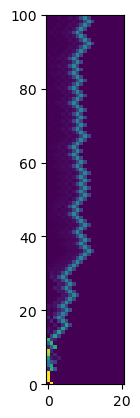

In [ ]:
plt.imshow(state_fluct)
plt.ylim(0,100)

In [ ]:
with open('state_fluct.pickle','wb') as f:
    pickle.dump(state_fluct,f)

In [ ]:
d=load_json("MPS_(0,1)_L20_pctrl0.500_pproj0.000_sC0_sm0_x01_DW_T.json")

NameError: name 'load_json' is not defined

In [ ]:
state_fluct = np.array(d['fdw']).T 

NameError: name 'd' is not defined

In [ ]:
with open('state_fluct.pickle','wb') as f:
    pickle.dump(state_fluct,f)

(20.0, 0.0)

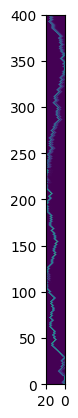

In [ ]:
plt.imshow( state_fluct)
# plt.imshow( np.array(d['fdw']).T )
plt.ylim(0,400)
plt.xlim(20,0)

# API O_i

In [6]:
L=30
params_list=[
({'nu':0,'de':1,},{'sC':np.arange(11),'sm':np.arange(500),'p_ctrl':[.4,.5,.6],'p_proj':np.linspace(0.0,0.0,1),'L':[L]}),
]

In [7]:
for fixed_params,vary_params in params_list:
    data_MPS_0_T_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_sC{sC}_sm{sm}_x01_Oi_T.json',
        fn_dir_template='.',
        input_params_template='',
        load_data=load_zip_json,
        filename=None,
        filelist=None,
        load=True,
        data_dict={'fn':set()},
        zip_fn=f'MPS_0-1_C_m_Oi_T_L{L}.zip'
    )
df_MPS_0_T=convert_pd(data_MPS_0_T_dict,names=['Metrics','sm','sC','p_ctrl','L','p_proj',])

generate_params:   0%|          | 0/16500 [00:00<?, ?it/s]

generate_params: 100%|██████████| 16500/16500 [00:10<00:00, 1649.01it/s]


In [ ]:
data_MPS_0_T_dict

In [ ]:
data_MPS_0_T_dict.keys()

In [95]:
sC=3

In [9]:
left_idx_list = [x[0]['Site'][0] for x in df_MPS_0_T.xs('op_history',level='Metrics').xs(sC,level='sC').xs(0.5,level='p_ctrl').xs(0.0,level='p_proj').xs(L,level='L')['observations'].iloc[0]]

In [84]:
right_idx_list = [x[0]['Site'][-1] for x in df_MPS_0_T.xs('op_history',level='Metrics').xs(sC,level='sC').xs(0.5,level='p_ctrl').xs(0.0,level='p_proj').xs(L,level='L')['observations'].iloc[0]]

In [85]:
type_list = [x[0]['Type'] for x in df_MPS_0_T.xs('op_history',level='Metrics').xs(sC,level='sC').xs(0.5,level='p_ctrl').xs(0.0,level='p_proj').xs(L,level='L')['observations'].iloc[0]]

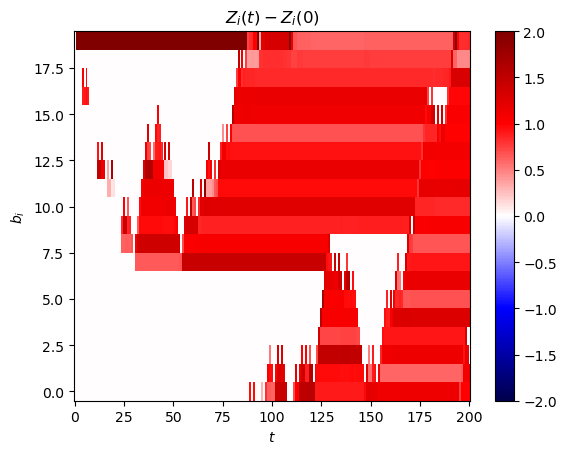

In [98]:
fig,ax=plt.subplots()
data = np.stack(df_MPS_0_T.xs('Oi',level='Metrics').xs(sC,level='sC').xs(0.5,level='p_ctrl').xs(0.0,level='p_proj').xs(L,level='L')['observations']).mean(axis=0)
rescaled_data = (data-data[:,0][:,np.newaxis])
# np.fft.fftshift
# im =ax.pcolormesh(np.fft.fftshift(rescaled_data,axes=0),cmap='seismic', shading='nearest', vmin=-2,vmax=2)
# im =ax.pcolormesh((np.fft.fftshift(rescaled_data,axes=())),cmap='seismic', shading='nearest', vmin=-2,vmax=2)
im =ax.pcolormesh(np.abs(np.fft.fftshift(rescaled_data,axes=())),cmap='seismic', shading='nearest', vmin=-2,vmax=2)
# im =ax.pcolormesh((data),cmap='Blues',vmin=-1,vmax=1)
plt.colorbar(im)
ax.set_title('$Z_i(t) - Z_i(0)$')

ax.set_xlabel('$t$')
ax.set_ylabel('$b_i$')
# ax.set_xlim(None,20)

color_list = {'Control':'yellow','Bernoulli':'red'}
# ax.scattploer(np.arange(len(left_idx_list))+1,left_idx_list, s=3,c = [color_list[idx] for idx in type_list])
# ax.scatter(np.arange(len(right_idx_list))+1,right_idx_list, s=3,c = [color_list[idx] for idx in type_list])

In [14]:
sC=0

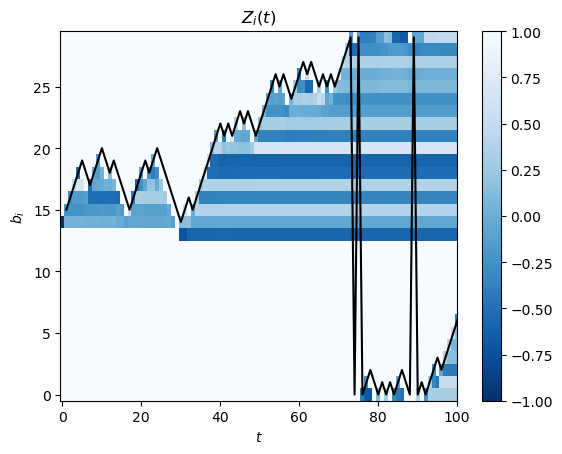

In [19]:
fig,ax=plt.subplots()
p_ctrl = 0.4
sC =2
data = np.stack(df_MPS_0_T.xs('Oi',level='Metrics').xs(sC,level='sC').xs(p_ctrl,level='p_ctrl').xs(0.0,level='p_proj').xs(L,level='L')['observations']).mean(axis=0)
rescaled_data = (data)
# np.fft.fftshift
# im =ax.pcolormesh(np.fft.fftshift(rescaled_data,axes=0),cmap='seismic', shading='nearest', vmin=-2,vmax=2)
im =ax.pcolormesh(np.fft.fftshift(rescaled_data,axes=(0)),cmap='Blues_r', shading='nearest', vmin=-1,vmax=1)
# im =ax.pcolormesh((data),cmap='Blues',vmin=-1,vmax=1)
plt.colorbar(im)
ax.set_title('$Z_i(t)$')

ax.set_xlabel('$t$')
ax.set_ylabel('$b_i$')
ax.set_xlim(None,100)

color_list = {'Control':'yellow','Bernoulli':'red'}
left_idx_list = [x[0]['Site'][0] for x in df_MPS_0_T.xs('op_history',level='Metrics').xs(sC,level='sC').xs(p_ctrl,level='p_ctrl').xs(0.0,level='p_proj').xs(L,level='L')['observations'].iloc[0]]
ax.plot(np.arange(len(left_idx_list))+1,(np.array(left_idx_list)+L//2)%L,color='k')
# ax.scatter(np.arange(len(right_idx_list))+1,right_idx_list, s=3,c = [color_list[idx] for idx in type_list])

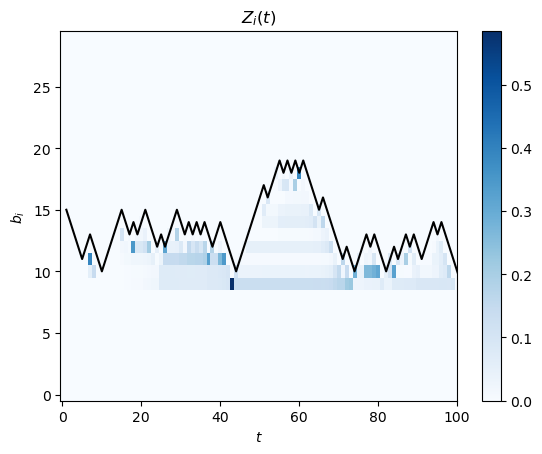

In [19]:
fig,ax=plt.subplots()
data = np.stack(df_MPS_0_T.xs('Oi',level='Metrics').xs(sC,level='sC').xs(0.5,level='p_ctrl').xs(0.0,level='p_proj').xs(L,level='L')['observations']).var(axis=0)
rescaled_data = (data)
# np.fft.fftshift
# im =ax.pcolormesh(np.fft.fftshift(rescaled_data,axes=0),cmap='seismic', shading='nearest', vmin=-2,vmax=2)
im =ax.pcolormesh(np.fft.fftshift(rescaled_data,axes=(0)),cmap='Blues', shading='nearest',)
# im =ax.pcolormesh((data),cmap='Blues',vmin=-1,vmax=1)
plt.colorbar(im)
ax.set_title('$Z_i(t)$')

ax.set_xlabel('$t$')
ax.set_ylabel('$b_i$')
ax.set_xlim(None,100)

color_list = {'Control':'yellow','Bernoulli':'red'}

ax.plot(np.arange(len(left_idx_list))+1,(np.array(left_idx_list)+L//2)%L,color='k')
# ax.scatter(np.arange(len(right_idx_list))+1,right_idx_list, s=3,c = [color_list[idx] for idx in type_list])

In [66]:
def plot_(sC):
    fig,axs=plt.subplots(1,2,figsize=(6,3),tight_layout=True)
    ax=axs[0]
    data = np.stack(df_MPS_0_T.xs('Oi',level='Metrics').xs(sC,level='sC').xs(0.5,level='p_ctrl').xs(0.0,level='p_proj').xs(L,level='L')['observations']).mean(axis=0)
    rescaled_data = (data)
    # np.fft.fftshift
    # im =ax.pcolormesh(np.fft.fftshift(rescaled_data,axes=0),cmap='seismic', shading='nearest', vmin=-2,vmax=2)
    im =ax.pcolormesh(np.fft.fftshift(rescaled_data,axes=(0)),cmap='Blues_r', shading='nearest', vmin=-1,vmax=1)
    # im =ax.pcolormesh((data),cmap='Blues',vmin=-1,vmax=1)
    plt.colorbar(im)
    ax.set_title(r'$\langle Z_i(t)\rangle$')
    bi=np.arange(0,L,5)


    

    ax=axs[1]
    data = np.stack(df_MPS_0_T.xs('Oi',level='Metrics').xs(sC,level='sC').xs(0.5,level='p_ctrl').xs(0.0,level='p_proj').xs(L,level='L')['observations']).var(axis=0)
    im =ax.pcolormesh(np.fft.fftshift(data,axes=(0)),cmap='Blues', shading='nearest',)
    plt.colorbar(im)
    ax.set_title('Var${}_{m_C}(Z_i(t))$')

    # color_list = {'Control':'yellow','Bernoulli':'red'}
    left_idx_list = [x[0]['Site'][0] for x in df_MPS_0_T.xs('op_history',level='Metrics').xs(sC,level='sC').xs(0.5,level='p_ctrl').xs(0.0,level='p_proj').xs(L,level='L')['observations'].iloc[0]]
    for ax in axs:
        ax.set_xlabel('$t$')
        ax.set_ylabel('$b_i$')
        ax.set_xlim(None,100)
        ax.set_yticks(bi)
        ax.set_yticklabels((bi+L//2)%L+1)
        ax.plot(np.arange(len(left_idx_list)),(np.array(left_idx_list)+L//2)%L,color = 'k',lw=1)
    # ax.scatter(np.arange(len(left_idx_list))+1,left_idx_list, s=3,c = [color_list[idx] for idx in type_list])
    # ax.scatter(np.arange(len(right_idx_list))+1,right_idx_list, s=3,c = [color_list[idx] for idx in type_list])

In [ ]:
for sC_ in range(1, 11):
    plot_(sC_)

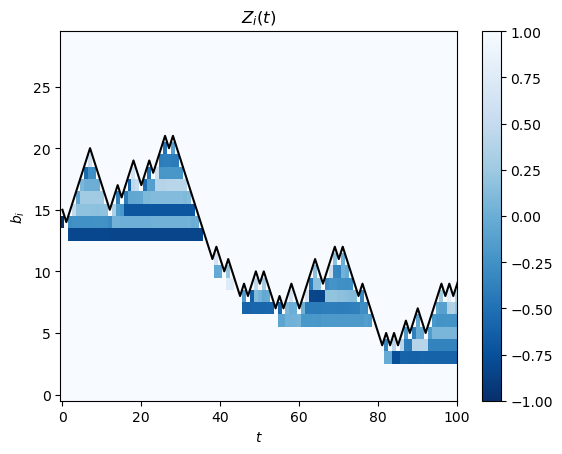

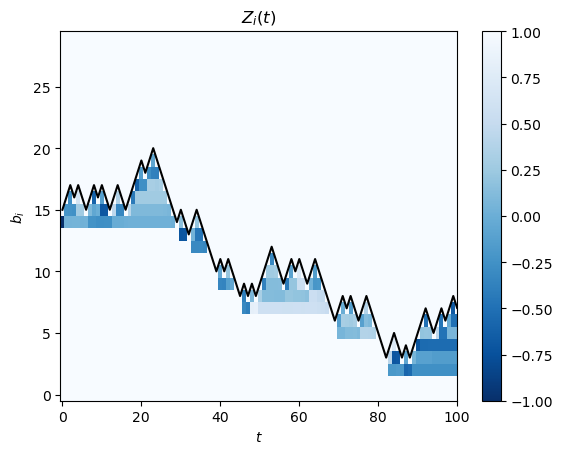

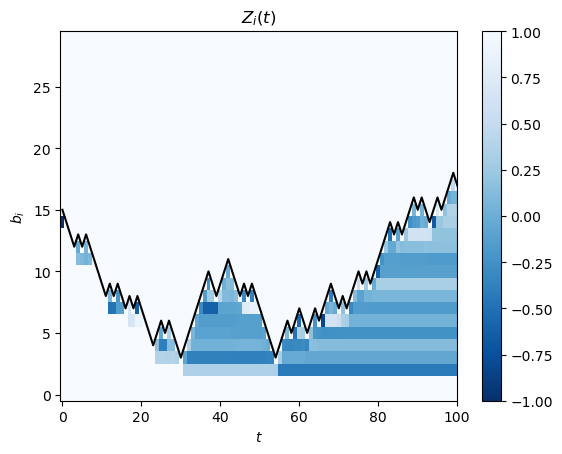

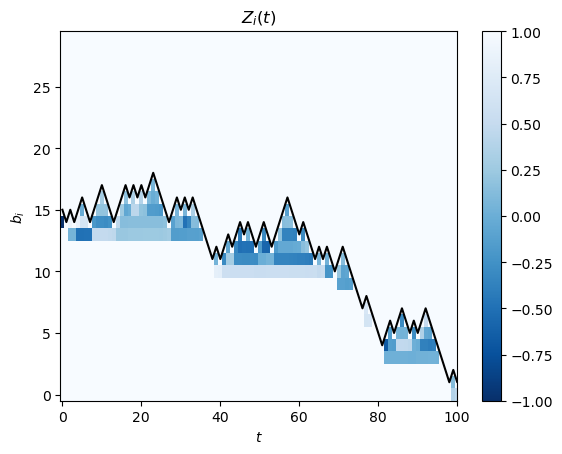

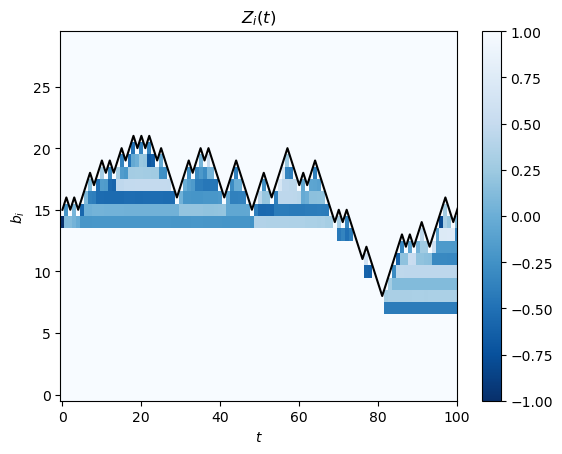

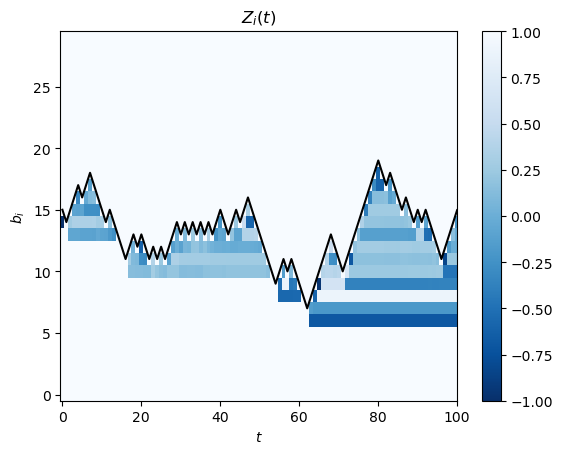

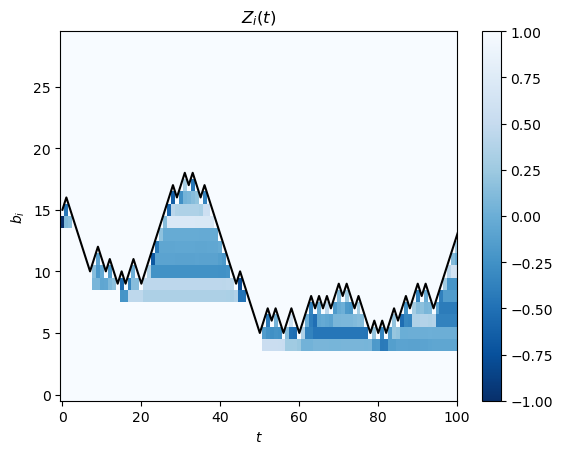

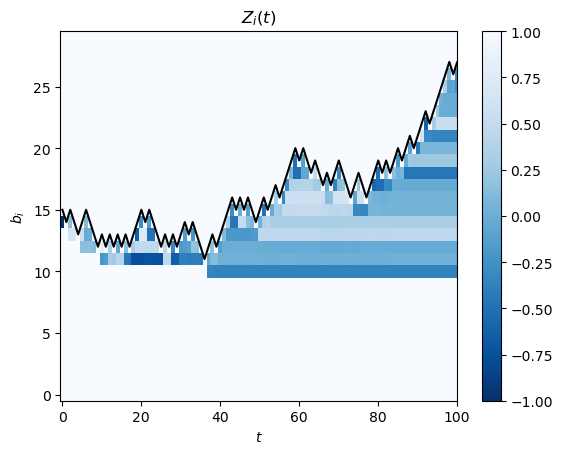

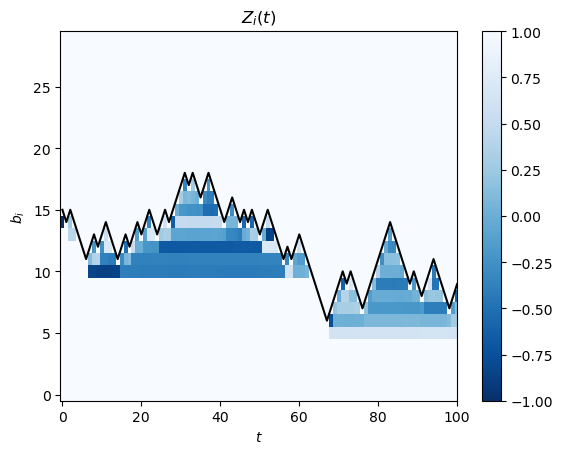

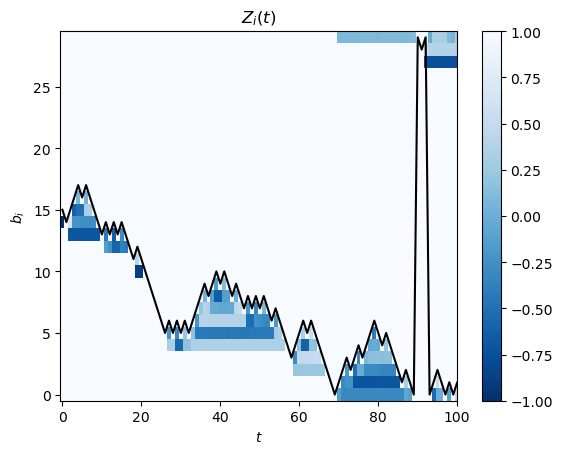

In [13]:
for sC_ in range(1, 11):
    plot_(sC_)

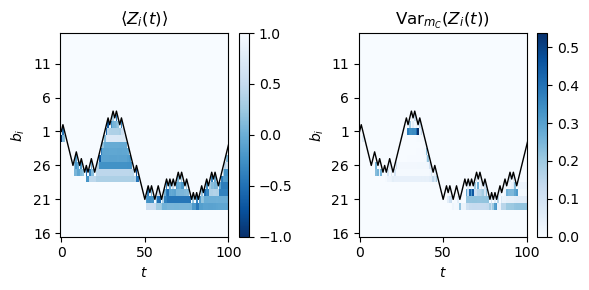

In [67]:
plot_(7)

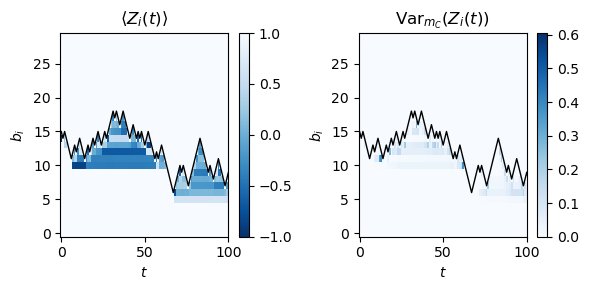

In [43]:
plot_(9)

In [5]:
sC=7
# data = df_MPS_0_T.xs(sC,level='sC').xs(0.5,level='p_ctrl').xs(0.0,level='p_proj').xs(L,level='L')['observations']
data = df_MPS_0_T.xs(0.5,level='p_ctrl').xs(0.0,level='p_proj').xs(L,level='L')['observations']


In [9]:
df_MPS_0_T.to_pickle('Zi.pickle')

In [8]:
data.to_pickle('Zi.pickle')

NameError: name 'data' is not defined

In [55]:
[{"type":d_[0]["Type"],"qubit":d_[0]['Site']} for idx,d_ in enumerate(data) if idx<100]

[{'type': 'Bernoulli', 'qubit': [30, 1]},
 {'type': 'Control', 'qubit': [1]},
 {'type': 'Control', 'qubit': [30]},
 {'type': 'Control', 'qubit': [29]},
 {'type': 'Control', 'qubit': [28]},
 {'type': 'Control', 'qubit': [27]},
 {'type': 'Control', 'qubit': [26]},
 {'type': 'Bernoulli', 'qubit': [25, 26]},
 {'type': 'Bernoulli', 'qubit': [26, 27]},
 {'type': 'Control', 'qubit': [27]},
 {'type': 'Control', 'qubit': [26]},
 {'type': 'Bernoulli', 'qubit': [25, 26]},
 {'type': 'Control', 'qubit': [26]},
 {'type': 'Control', 'qubit': [25]},
 {'type': 'Bernoulli', 'qubit': [24, 25]},
 {'type': 'Control', 'qubit': [25]},
 {'type': 'Bernoulli', 'qubit': [24, 25]},
 {'type': 'Bernoulli', 'qubit': [25, 26]},
 {'type': 'Control', 'qubit': [26]},
 {'type': 'Control', 'qubit': [25]},
 {'type': 'Bernoulli', 'qubit': [24, 25]},
 {'type': 'Bernoulli', 'qubit': [25, 26]},
 {'type': 'Bernoulli', 'qubit': [26, 27]},
 {'type': 'Bernoulli', 'qubit': [27, 28]},
 {'type': 'Bernoulli', 'qubit': [28, 29]},
 {'ty

In [114]:
100**2/2

5000.0

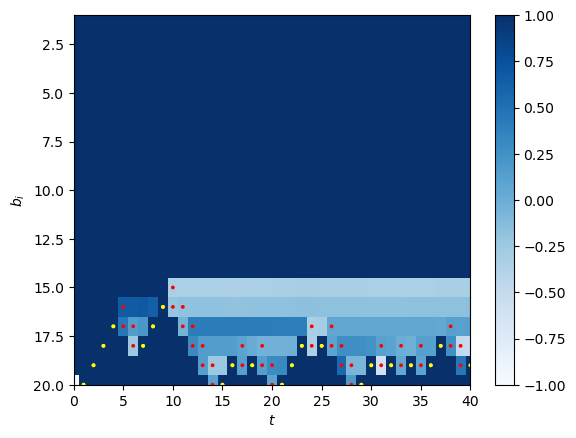

In [ ]:
fig,ax=plt.subplots()
data = np.stack(df_MPS_0_T.xs('Oi',level='Metrics').xs(sC,level='sC').xs(0.5,level='p_ctrl').xs(0.0,level='p_proj').xs(L,level='L')['observations']).mean(axis=0)
im =ax.pcolormesh(np.arange(data.shape[1]),np.arange(data.shape[0])+1,(data),cmap='Blues',vmin=-1,vmax=1, shading='nearest')
# ax.set_ylim(1,20)
ax.set_ylim(20,1)

ax.set_xlim(0,40)
# im =ax.pcolormesh((data),cmap='Blues',vmin=-1,vmax=1)
plt.colorbar(im)
ax.set_xlabel('$t$')
ax.set_ylabel('$b_i$')


color_list = {'Control':'yellow','Bernoulli':'red'}
ax.scatter(np.arange(len(left_idx_list))+1,left_idx_list, s=3,c = [color_list[idx] for idx in type_list])
ax.scatter(np.arange(len(right_idx_list))+1,right_idx_list, s=3,c = [color_list[idx] for idx in type_list])

In [11]:
data_MPS_0_T_dict[('Oi', 0, 0, 0.5, 10, 0.0)]

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [-1., -1., -1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]], shape=(10, 201))

In [ ]:
np.array(d['fdw'])[:,:100].T

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.08734458e-01, 1.83112632e-01, 4.08152911e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.95590764e-03, 3.87437156e-01, 1.95454026e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.83185048e-08, 4.30286060e-08, 5.34112225e-08, ...,
        0.00000000e+00, 0.00000000e+00, 3.59378594e-38],
       [1.18237647e-08, 1.40628783e-08, 8.54604679e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.25968096e-09, 1.28018855e-08, 8.82507652e-09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [6]:
d=load_json("MPS_(0,1)_L6_pctrl0.400_pproj0.000_sC2_sm0_x01_Oi_T.json")

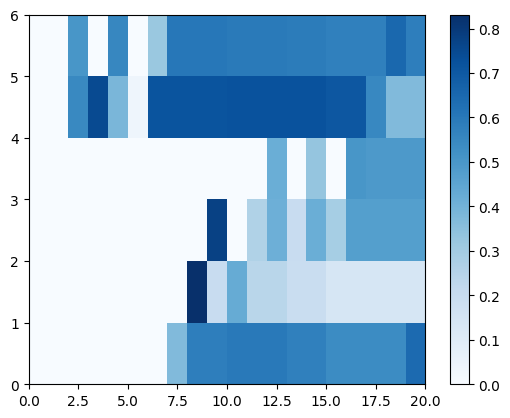

In [7]:
plt.pcolormesh(
    (1-np.array(d['Oi'])[:,:20])/2, cmap='Blues')
plt.colorbar()

In [ ]:
d['op_history']

[[{'Site': [10], 'Outcome': [0], 'Type': 'Control'}],
 [{'Site': [9, 10], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [10], 'Outcome': [1], 'Type': 'Control'}],
 [{'Site': [9, 10], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [10], 'Outcome': [0], 'Type': 'Control'}],
 [{'Site': [9, 10], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [10], 'Outcome': [0], 'Type': 'Control'}],
 [{'Site': [9, 10], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [10], 'Outcome': [0], 'Type': 'Control'}],
 [{'Site': [9], 'Outcome': [0], 'Type': 'Control'}],
 [{'Site': [8, 9], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [9], 'Outcome': [0], 'Type': 'Control'}],
 [{'Site': [8, 9], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [9, 10], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [10, 1], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [1, 2], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [2, 3], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [3, 4], 'Outcome'